In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def ld_csv_x(filename):
    with open(filename, 'r') as file:
        csv_readr = csv.reader(file)
        thelist=[]
        for row in csv_readr:
            if len (row) !=0:
                thelist = thelist + [row]

    dataset = np.array(thelist).astype("float")
    return dataset

def ld_csv_y(filename):
    with open(filename, 'r') as file_label:
        label_read = csv.reader(file_label)
        label_list=[]
        for row in label_read:
            if len (row) !=0:
                label_list = label_list + [row]

    data_label = []

    for row in label_list:
        data_label.append(row[0])
    data_label = np.array(data_label).astype("float")
    
    return data_label

In [2]:
def plotSVMBoundaries(training, label_train, classifier, support_vectors = []):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # classifier: sklearn classifier model, must have a predict() function
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 0.01
    min_x = np.floor(min(training[:, 0])) - 0.01
    max_y = np.ceil(max(training[:, 1])) + 0.01
    min_y = np.floor(min(training[:, 1])) - 0.01

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    pred_label = classifier.predict(xy)
    
    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #turn on interactive mode
    plt.figure()
    #plt.ion()

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    unique_labels = np.unique(label_train)
    # plot the class training data.
    plt.plot(training[label_train == unique_labels[0], 0],training[label_train == unique_labels[0], 1], 'rx')
    plt.plot(training[label_train == unique_labels[1], 0],training[label_train == unique_labels[1], 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == unique_labels[2], 0],training[label_train == unique_labels[2], 1], 'b*')

    
    # plot support vectors
    if len(support_vectors)>0:
        sv_x = support_vectors[:, 0]
        sv_y = support_vectors[:, 1]
        plt.scatter(sv_x, sv_y, s = 100, c = 'cyan')
    
    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    elif nclass == 2 and support_vectors == 0:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    else: 
        l = plt.legend(('Class 1', 'Class 2', 'SV'), loc=2)
    plt.gca().add_artist(l)
    

    plt.show()
    

In [3]:
def Linear_Kernel(C_value, x, y): 
    clf = SVC(C = C_value, kernel='linear', random_state = 0)
    clf.fit(x, y)
    label = clf.predict(x) 
    wt0 = clf.intercept_
    wt12 = clf.coef_ 
    weights = [] 
    weights.append(wt0)
    weights.append(wt12)
    sv = clf.support_vectors_
    return clf, sv, weights, label

def RBF_Kernel(C_value, x, y): 
    clf = SVC(C = C_value, kernel='rbf', random_state = 0, gamma = 'auto') 
    clf.fit(x, y) 
    label = clf.predict(x) 
    sv = clf.support_vectors_ 
    return clf, sv, label

Accuracy when C = 1 is 90.0


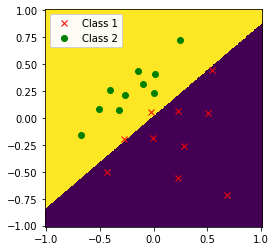

Accuracy when C = 100 is 100.0


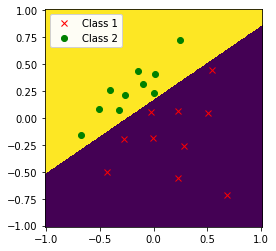

In [4]:
filename = 'train_x.csv'
train_data = ld_csv_x(filename)
filename1 = 'train_y.csv'
label_data = ld_csv_y(filename1)

clf1, sv1, weights1, labels1 = np.array(Linear_Kernel(1,train_data, label_data))
acc1 = accuracy_score(labels1, label_data)
clf100, sv100, weights100, labels100  = np.array(Linear_Kernel(100, train_data, label_data))
acc100 = accuracy_score(labels100, label_data)

print("Accuracy when C = 1 is", acc1*100)
plot1 = plotSVMBoundaries(train_data, label_data,clf1)
print("Accuracy when C = 100 is", acc100*100)
plot100 = plotSVMBoundaries(train_data, label_data,clf100)

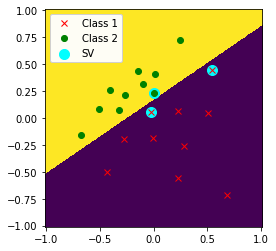

The weights = 
  [array([-1.79836766]), array([[-7.11966384, 10.40264821]])]

 The support vectors  = 
  [[-0.023855   0.06042  ]
 [ 0.54579    0.45029  ]
 [ 0.0064864  0.23394  ]]


In [5]:
plot100 = plotSVMBoundaries(train_data, label_data,clf100,sv100) 

print("The weights = \n ", weights100 ) 
print("\n The support vectors  = \n ", sv100)

Accuracy when C = 50 is 95.0


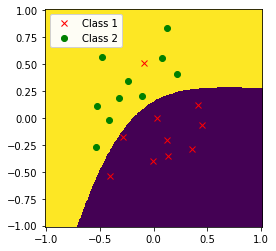

Accuracy when C = 5000 is 100.0


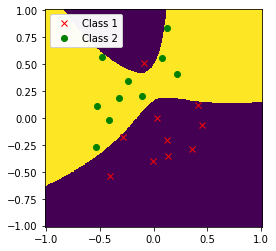

In [6]:
filename2 = 'train_x_2.csv'
train_data_2 = ld_csv_x(filename2)
filename3 = 'train_y_2.csv'
label_data_2 = ld_csv_y(filename3)

clf50, sv50, labels50 = np.array(RBF_Kernel(50, train_data_2, label_data_2))
acc50 = accuracy_score(label_data_2, labels50)
clf5000, sv5000, labels5000 = np.array(RBF_Kernel(5000, train_data_2, label_data_2))
acc5000 = accuracy_score(label_data_2, labels5000)

print("Accuracy when C = 50 is", acc50*100)
plot50 = plotSVMBoundaries (train_data_2, label_data_2,clf50)
print("Accuracy when C = 5000 is", acc5000*100)
plot5000 = plotSVMBoundaries (train_data_2, label_data_2,clf5000) 

Accuracy when gamma = 10 is 95.0


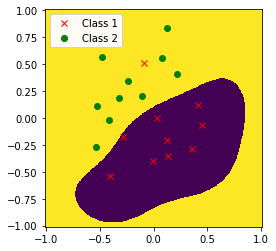

Accuracy when gamma = 50 is 100.0


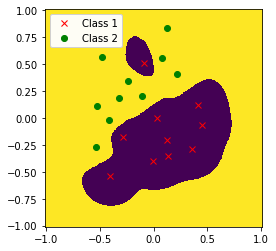

Accuracy when gamma = 500 is 100.0


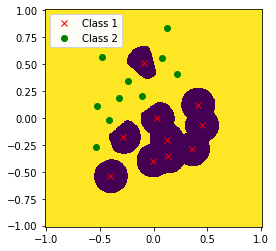

In [7]:
def RBF_Krnl_1(gamma_value, x, y): 
    clf = SVC(C = 1.0,  kernel='rbf', gamma = gamma_value, random_state = 0)
    clf.fit(x, y) 
    labels = clf.predict(x) 
    sv = clf.support_vectors_ 
    return clf, sv, labels 

clf10,sv10, labels10 = np.array(RBF_Krnl_1(10, train_data_2, label_data_2)) 
acc10 = accuracy_score(label_data_2,labels10)
print("Accuracy when gamma = 10 is", acc10*100)
plot_10 = plotSVMBoundaries (train_data_2, label_data_2,clf10) 

clf50, sv50, labels50 = np.array(RBF_Krnl_1(50, train_data_2, label_data_2))
acc50 = accuracy_score(label_data_2,labels50)
print("Accuracy when gamma = 50 is", acc50*100)
plot_50 = plotSVMBoundaries (train_data_2, label_data_2,clf50)

clf500, sv500, labels500 = np.array(RBF_Krnl_1(500, train_data_2, label_data_2))
acc500 = accuracy_score(label_data_2,labels500)
print("Accuracy when gamma = 500 is", acc500*100)
plot_500 = plotSVMBoundaries (train_data_2, label_data_2,clf500) 

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

feature_tr = np.genfromtxt('feature_train.csv', delimiter=',') 
label_tr = np.genfromtxt('label_train.csv', delimiter=',')
feature_te = np.genfromtxt('feature_test.csv',delimiter =',') 
label_te = np.genfromtxt('label_test.csv', delimiter=', ') 
label_tr = np.vstack(label_tr) 
label_te = np.vstack(label_te) 
train_data = feature_tr[:,0:2] 
test_data = feature_te[:,0:2]
train_data_wlabels = np.column_stack((train_data, label_tr)) 
cv = StratifiedKFold(5) 
precomputed_folds = list(cv.split(train_data, label_tr)) 

accuracy = []
for train_index, test_index in cv.split(train_data, label_tr): 
    count = 0
    X_train, X_test = train_data[train_index], train_data[test_index]
    clf = SVC(C = 1, kernel='rbf', gamma = 1)
    clf.fit(X_train, train_data_wlabels[train_index, 2:3]) 
    labels = clf.predict(X_test) 
    sample = train_data_wlabels[test_index, 2:3] 
    for i in range(0, len(labels)): 
        if(labels[i] == sample[i]): 
            count = count+1
    accuracy.append((count/len(labels))*100)
average_acc = np.mean(accuracy); 

print("The average cross-validation accuracy =", average_acc)

The average cross-validation accuracy = 81.96078431372548


C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# Part (b)

The best pair is C = 0.868511373751352 and gamma = 0.49417133613238334
The mean Cross-Validation Accuracy for the best pair =  0.8660130718954248
The Standard deviation for the best pair =  0.0433052778391567


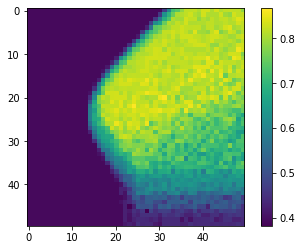

In [9]:
X_train = np.genfromtxt('feature_train.csv', delimiter=",")[:,0:2]
y_train = np.genfromtxt('label_train.csv', delimiter=",")
skf = StratifiedKFold(n_splits = 5, shuffle = True)
Cs = np.logspace(-3, 3, 50)
gammas = np.logspace(-3, 3, 50)
ACC = np.zeros((50,50))
DEV = np.zeros((50,50))

for i, gamma in enumerate(gammas):
    for j, C in enumerate(Cs):  
        acc = []
        for train_index, dev_index in skf.split(X_train, y_train):
            X_cv_train, X_cv_dev = X_train[train_index], X_train[dev_index]
            y_cv_train, y_cv_dev = y_train[train_index], y_train[dev_index]
            clf = SVC(C = C, kernel = 'rbf', gamma = gamma )
            clf.fit(X_cv_train, y_cv_train)
            acc.append(accuracy_score(y_cv_dev, clf.predict(X_cv_dev)))
        
        ACC[i,j] = np.mean(acc)
        DEV[i,j] = np.std(acc)
        
plt.imshow(ACC)
plt.colorbar()

i, j = np.argwhere(ACC == np.max(ACC))[0]
print('The best pair is C = ' + str(Cs[j]) + ' and gamma = ' + str(gammas[i]))
print('The mean Cross-Validation Accuracy for the best pair = ', ACC[i,j])
print('The Standard deviation for the best pair = ', DEV[i,j])

# Part (c)

In [10]:
X_train = np.genfromtxt('feature_train.csv', delimiter=",")[:,0:2]
X_test = np.genfromtxt('feature_test.csv', delimiter=",")[:,0:2]
y_train = np.genfromtxt('label_train.csv', delimiter=",")
y_test = np.genfromtxt('label_test.csv', delimiter=",")

skf = StratifiedKFold(n_splits = 5, shuffle = True)
Cs = np.logspace(-3, 3, 50)
gammas = np.logspace(-3, 3, 50)

accuracy = np.zeros((50,50))
dev = np.zeros((50,50))

pair_history = [0, 0]
ACC = []
DEV = []

for t in range(0, 20):
    for i, gamma in enumerate(gammas):
        for j, C in enumerate(Cs):
            acc = []
            for train_index, dev_index in skf.split(X_train, y_train):
                X_cv_train, X_cv_dev = X_train[train_index], X_train[dev_index]
                y_cv_train, y_cv_dev = y_train[train_index], y_train[dev_index]
                clf = SVC(C = C, kernel = 'rbf', gamma = gamma, decision_function_shape = 'ovr')
                clf.fit(X_cv_train, y_cv_train)
                acc.append(accuracy_score(y_cv_dev, clf.predict(X_cv_dev)))
            
            accuracy[i,j] = np.mean(acc)
            dev[i,j] = np.std(acc)   
    i, j = np.argwhere(accuracy == np.max(accuracy))[0]
    pair_history = np.vstack([pair_history, [gammas[i], Cs[j]]])
    ACC.append(accuracy[i,j])
    DEV.append(dev[i,j])

pair_history = pair_history[1:]
print('The 20 chosen pairs = \n', pair_history)
i = np.argwhere(ACC == np.max(ACC))[0]
print('The best pair is gamma = ' + str(pair_history[int(i),0]) + ' and C = ' + str(pair_history[int(i),1]))
print('The mean Cross-Validation Accuracy for the best pair = ', ACC[int(i)])
print('The Standard deviation for the best pair = ', DEV[int(i)])

The 20 chosen pairs = 
 [[6.55128557e-01 1.52641797e+00]
 [3.72759372e-01 4.71486636e+00]
 [2.12095089e-01 4.49843267e+01]
 [6.55128557e-01 1.09854114e+01]
 [1.59985872e-01 3.23745754e+02]
 [4.94171336e-01 1.52641797e+00]
 [2.12095089e-01 1.09854114e+01]
 [2.81176870e-01 1.45634848e+01]
 [3.72759372e-01 2.02358965e+00]
 [2.12095089e-01 3.39322177e+01]
 [2.94705170e-02 2.44205309e+02]
 [3.72759372e-01 3.55648031e+00]
 [1.59985872e-01 1.04811313e+02]
 [2.12095089e-01 1.93069773e+01]
 [2.12095089e-01 1.52641797e+00]
 [6.55128557e-01 1.09854114e+01]
 [1.59985872e-01 2.55954792e+01]
 [2.12095089e-01 1.38949549e+02]
 [4.09491506e-03 1.84206997e+02]
 [1.20679264e-01 1.04811313e+02]]
The best pair is gamma = 0.49417133613238334 and C = 1.5264179671752334
The mean Cross-Validation Accuracy for the best pair =  0.877124183006536
The Standard deviation for the best pair =  0.04053341629729058


# Part (d)

Test accuracy  =  0.797752808988764


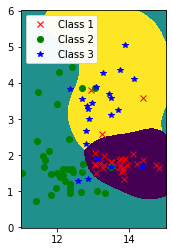

In [11]:
clf1 = SVC(C = pair_history[int(i),0], kernel = 'rbf', gamma = pair_history[int(i),1], decision_function_shape = 'ovr')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test accuracy  = ', acc)
plotSVMBoundaries(X_train, y_train, clf1)
